[1] 0

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


 Sex          Length          Diameter          Height        Whole_weight   
 F:1307   Min.   :0.2025   Min.   :0.1550   Min.   :0.0400   Min.   :0.0020  
 I:1342   1st Qu.:0.4500   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.5450   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.5244   Mean   :0.4083   Mean   :0.1393   Mean   :0.8274  
          3rd Qu.:0.6150   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.8150   Max.   :0.6500   Max.   :0.2400   Max.   :2.2203  
 Shucked_weight   Viscera_weight    Shell_weight        Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 3.500  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3578   Mean   :0.1803   Mean   :0.2380   Mean   : 9.766  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :0.9760   Max.   :0.4923   Max. 

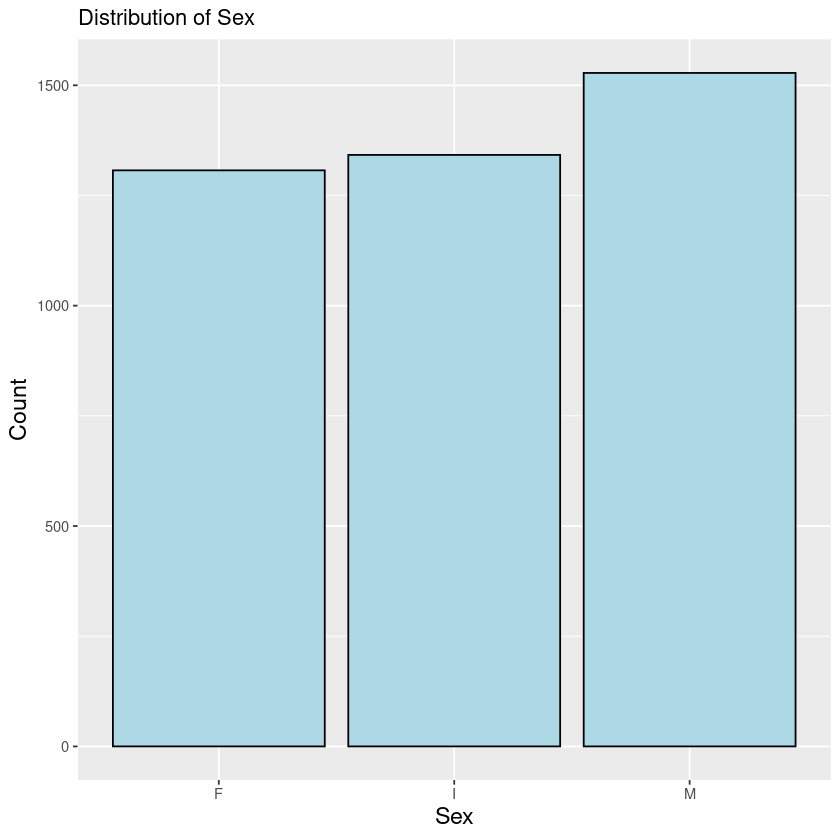

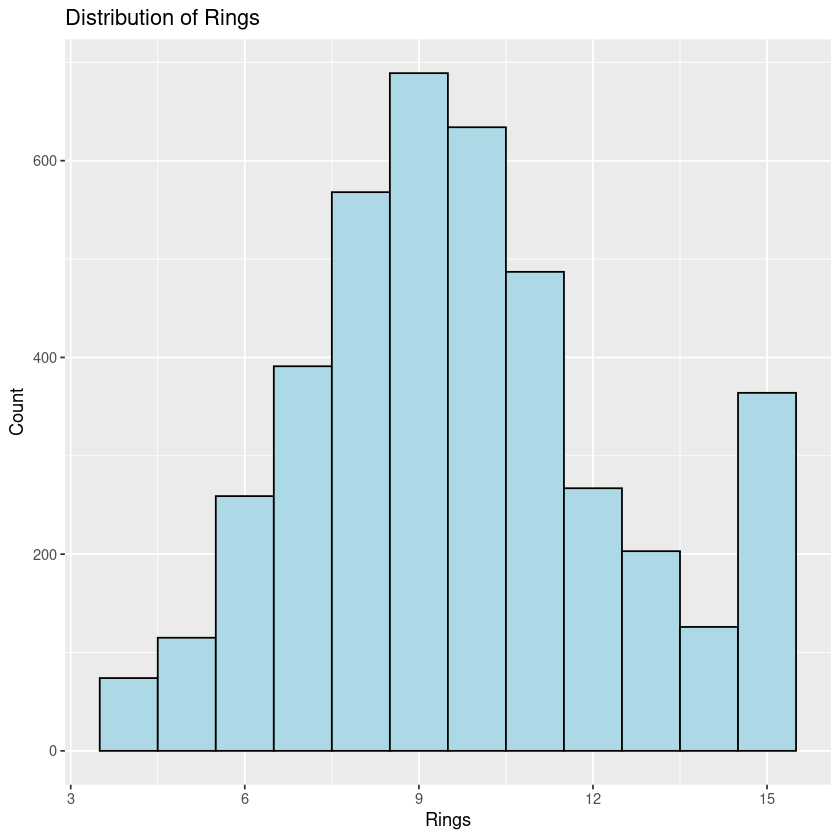

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


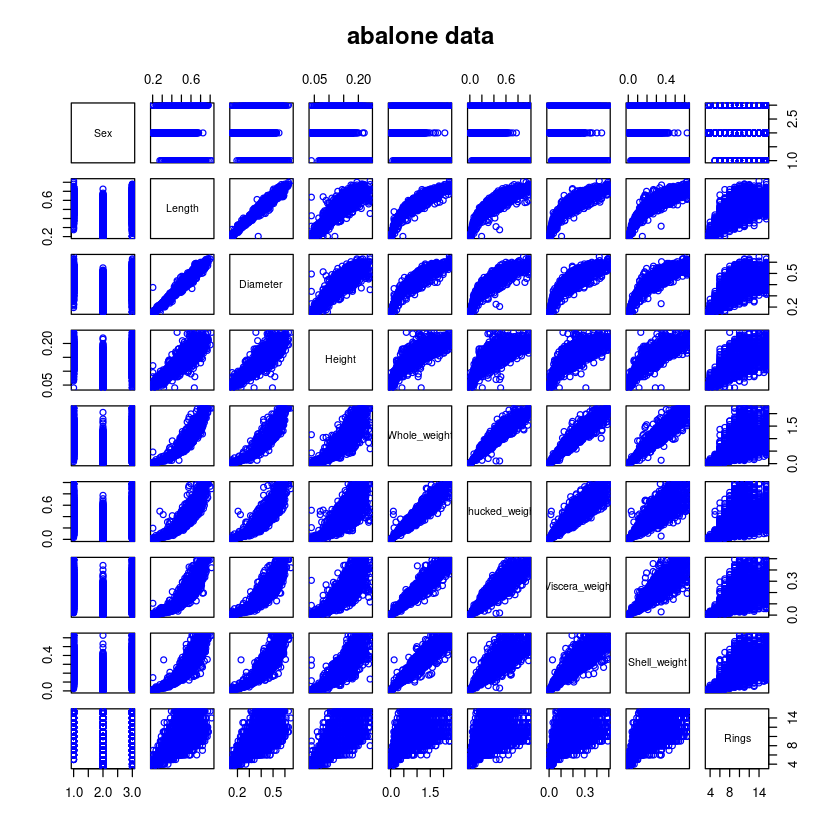

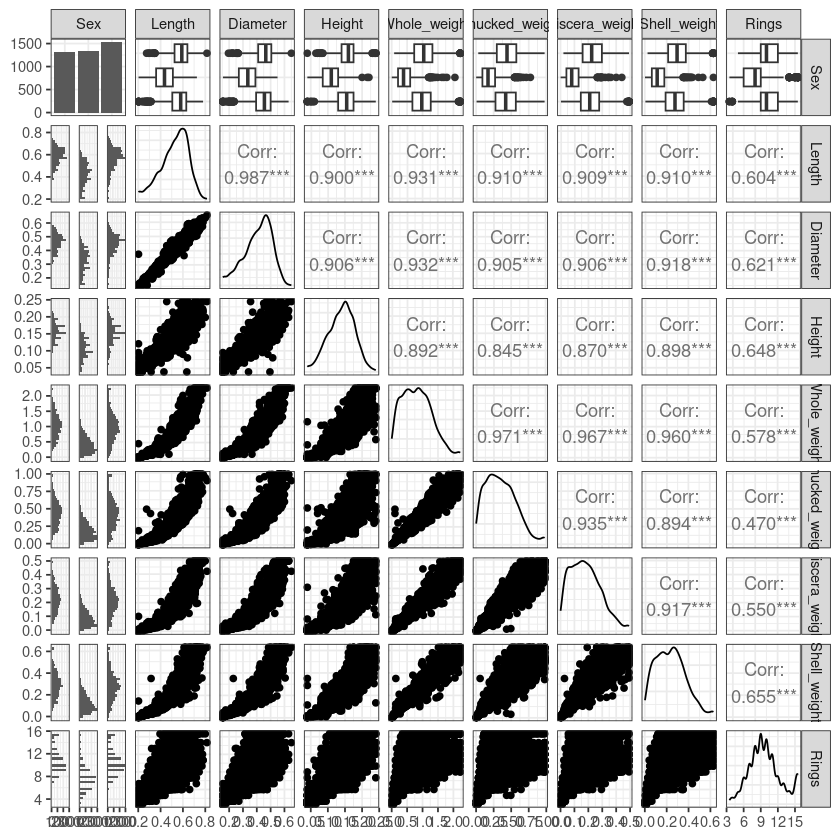

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,SexF,SexI,SexM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
4,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
6,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


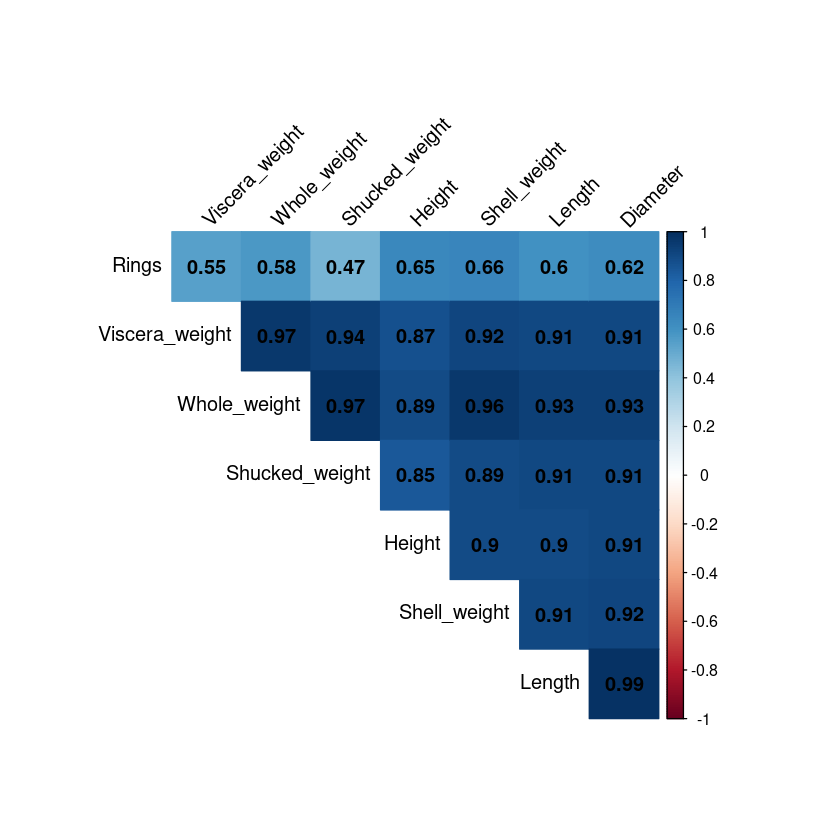

In [8]:
library(dplyr)
library(ggplot2)
library(GGally)
library(corrplot)
library(glmnet)
library(caret)
library(randomForest)

dataset_url = "https://raw.githubusercontent.com/ccscaiado/MLRepo/main/Assignment%202%20Datasets/Abalone/abalone.data"

# Download the dataset
download.file(dataset_url, destfile = "abalone.csv")

# Read the downloaded dataset 
abalone_data = read.csv("abalone.csv", header = FALSE) 
col_names = c("Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings")
colnames(abalone_data) = col_names

# 1.Data Cleaning and Exploratory Data Analysis 

# Convert 'Sex' to a factor variable
abalone_data = abalone_data %>%
  mutate(Sex = factor(Sex))


# Check for missing values
sum(is.na(abalone_data))


# Detecting outliers
numeric_columns = sapply(abalone_data, is.numeric)

#For each numeric column, replace outliers with the lower or upper bound
for (column_name in names(numeric_columns)[numeric_columns]) {
  # Calculate IQR
  Q1 = quantile(abalone_data[[column_name]], 0.25, na.rm = TRUE)
  Q3 = quantile(abalone_data[[column_name]], 0.75, na.rm = TRUE)
  IQR = Q3 - Q1
  
  # Define the bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  # Replace outliers with bounds
  abalone_data[[column_name]][abalone_data[[column_name]] < lower_bound] = lower_bound
  abalone_data[[column_name]][abalone_data[[column_name]] > upper_bound] = upper_bound
}


# View the first few rows of the dataset
head(abalone_data)


# Exploratory Data Analysis (EDA)

# Summary statistics for numerical data
summary(abalone_data)

# Distribution of Sex Categories in Abalone Data"
ggplot(abalone_data, aes(x = Sex)) + 
  geom_bar(color='black',fill='lightblue') +
  xlab("Sex") +
  ylab("Count") +
  ggtitle("Distribution of Sex ")+
  theme(axis.title = element_text(size = 14))

#Distribution of Rings in Abalone Data
ggplot(abalone_data, aes(x = Rings)) +
  geom_histogram(binwidth = 1,color='black',fill='lightblue') +
  xlab("Rings") +
  ylab("Count") +
  ggtitle("Distribution of Rings")

# Create pairs plots
pairs(abalone_data,main = "abalone data", col='blue')
ggpairs(abalone_data)+theme_bw()


# Calculate the correlation matrix
cor_matrix <- cor(abalone_data[, sapply(abalone_data, is.numeric)], use = "complete.obs")

# Create the heatmap
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 45, # Text label color and rotation
         diag = FALSE) # Exclude the diagonal


# One-hot encoding
abalone_data_dummies = model.matrix(~ Sex - 1, data = abalone_data)

# Bind the new dummy variables to the original data frame (excluding the original 'Sex' column)
abalone_data = cbind(abalone_data[, -which(names(abalone_data) == "Sex")], abalone_data_dummies)
head(abalone_data)


# Set random seed for reproducibility
set.seed(42)

size = round(nrow(abalone_data) * 0.20)
ind = sample(1:nrow(abalone_data), size = size)

# Generate train and test sets based on indices
testData <- abalone_data[ind, ]
trainData <- abalone_data[-ind, ]



Call:  cv.glmnet(x = X_train, y = y_train, nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure     SE Nonzero
min 0.00126    79   3.344 0.1334       9
1se 0.04744    40   3.473 0.1340       5

Mean Absolute Error: 1.348806 
Root Mean Squared Error: 1.723893 
R-squared: 0.6213022 


11 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)      3.17523938
Length           0.05676502
Diameter        10.53475827
Height          20.40362628
Whole_weight     5.59315681
Shucked_weight -15.43436151
Viscera_weight  -6.66000639
Shell_weight     7.19840044
SexF             .         
SexI            -0.75814907
SexM             0.05623452

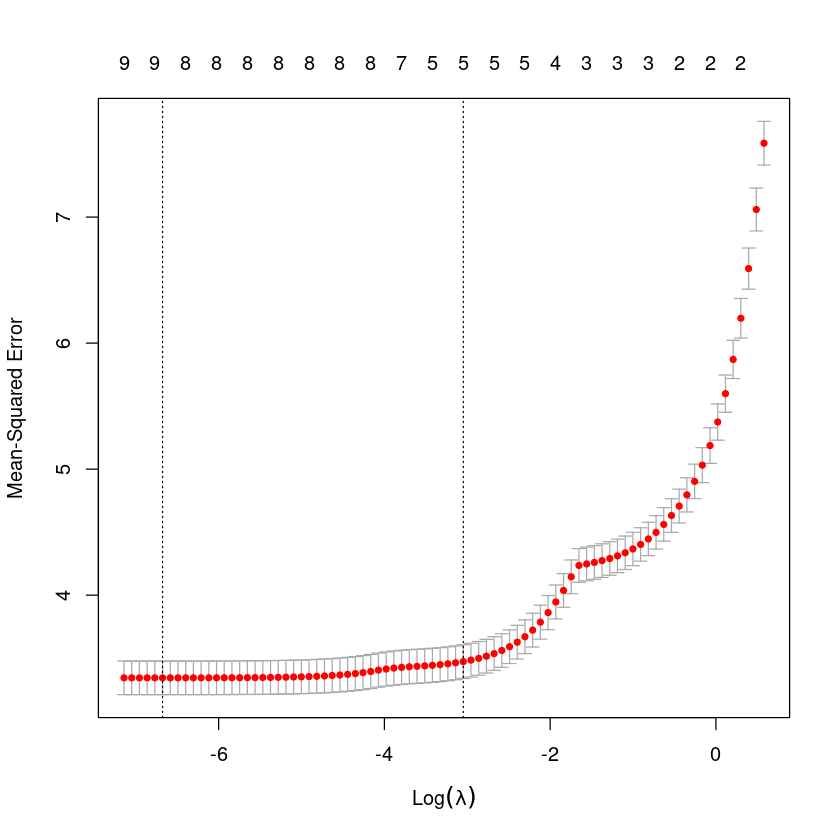

In [9]:
# 2.Lasso

# Extract response and predictor variables from train and test sets
y_train = trainData$Rings
X_train = as.matrix(trainData[, -which(names(trainData) == "Rings")])
y_test = testData$Rings
X_test = as.matrix(testData[, -which(names(testData) == "Rings")])


# Use the cv.glmnet function to try to find the "best" value of  lambda  using cross-validation
cv_model = cv.glmnet(X_train, y_train, alpha = 1, nfolds=10) # alpha=1 for Lasso
cv_model
best_lambda = cv_model$lambda.min

#visualize the cross-validation results
plot(cv_model)

# Fit Lasso model with the optimal lambda
lasso_model = glmnet(X_train, y_train, alpha = 1, lambda = best_lambda )

# Make predictions on the test set
pred_lasso = predict(lasso_model, newx = X_test, s = best_lambda )

# Evaluate the model performance
lasso_MAE = MAE(pred_lasso, y_test)
lasso_RMSE = RMSE(pred_lasso, y_test)
lasso_R2 = cor(y_test, pred_lasso)^2

cat("Mean Absolute Error:", lasso_MAE, "\n")
cat("Root Mean Squared Error:", lasso_RMSE, "\n")
cat("R-squared:", lasso_R2, "\n")


# Check the coefficients
coef(lasso_model, s = best_lambda )




Call:
 randomForest(formula = Rings ~ ., data = trainData, ntree = 800,      mtry = 3) 
               Type of random forest: regression
                     Number of trees: 800
No. of variables tried at each split: 3

          Mean of squared residuals: 3.068461
                    % Var explained: 59.62

,IncNodePurity
Length,1942.5744
Diameter,2601.1609
Height,3243.0509
Whole_weight,3239.7413
Shucked_weight,3019.4185
Viscera_weight,3046.1276
Shell_weight,6080.1009
SexF,231.8425
SexI,515.9216
SexM,191.3384


[1] "Mean Absolute Error:  1.30699107993114"
[1] "Root Mean Squared Error:  1.68227167926132"
[1] "R-squared:  0.641570893165089"


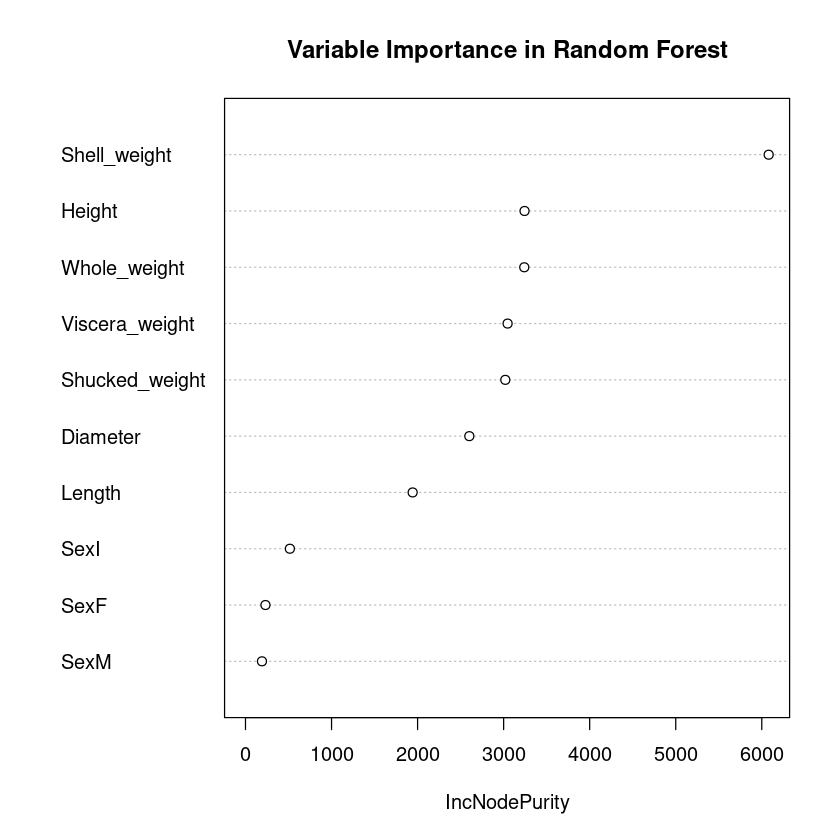

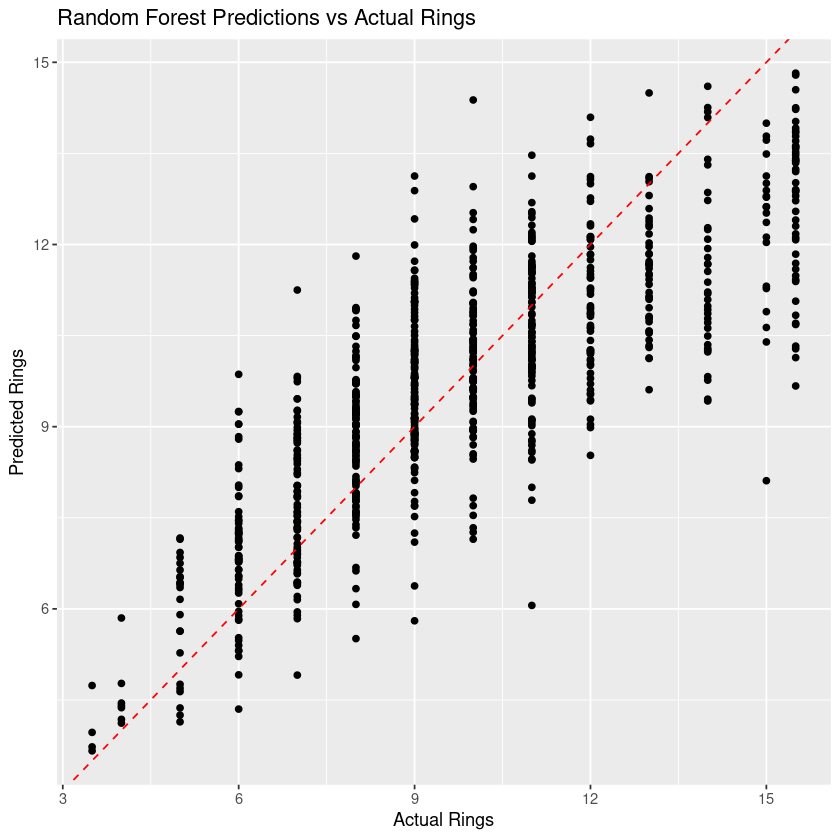

In [10]:
# 3. random forest

testData = abalone_data[ind, ]
trainData = abalone_data[-ind, ]


rf_model = randomForest(Rings ~ ., data = trainData, ntree = 800, mtry = 3)

rf_model

# Visualize variable importance using a plot
importance(rf_model)
varImpPlot(rf_model,main = 'Variable Importance in Random Forest')


# Make predictions using the test set
pred_rf = predict(rf_model, newdata = testData)
# Add predicted values as a new column to the testdata
pred_testData = testData
pred_testData$Predicted_Rings <- pred_rf

# Evaluate the model performance
rf_MAE = MAE(pred_rf, testData$Rings)
rf_RMSE= RMSE(pred_rf, testData$Rings)
rf_R2 = cor(testData$Rings, pred_rf)^2

print(paste("Mean Absolute Error: ", rf_MAE))
print(paste("Root Mean Squared Error: ",rf_RMSE))
print(paste("R-squared: ",rf_R2))

# Create a scatter plot comparing actual and predicted Rings values
ggplot(pred_testData, aes(x = Rings, y = Predicted_Rings)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, colour = "red", linetype="dashed") +
  labs(x = "Actual Rings", y = "Predicted Rings", title = "Random Forest Predictions vs Actual Rings")

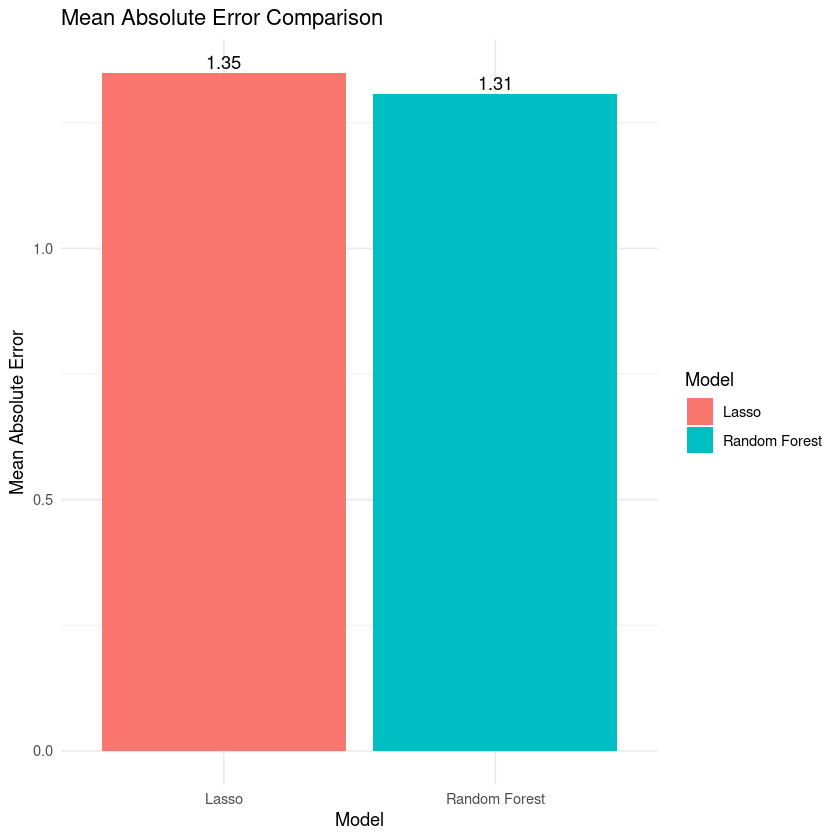

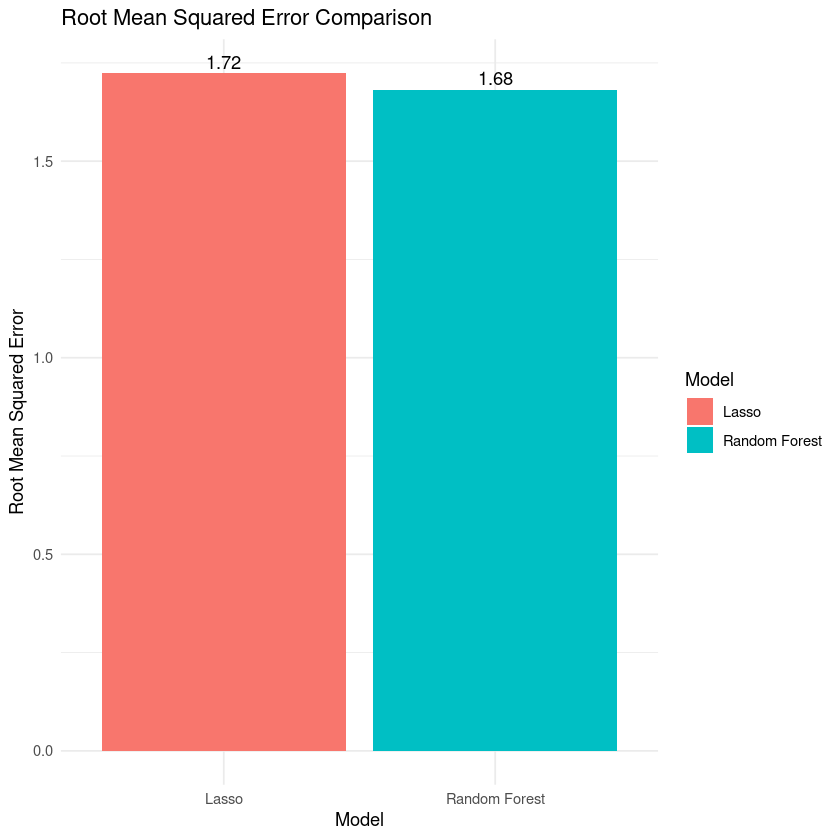

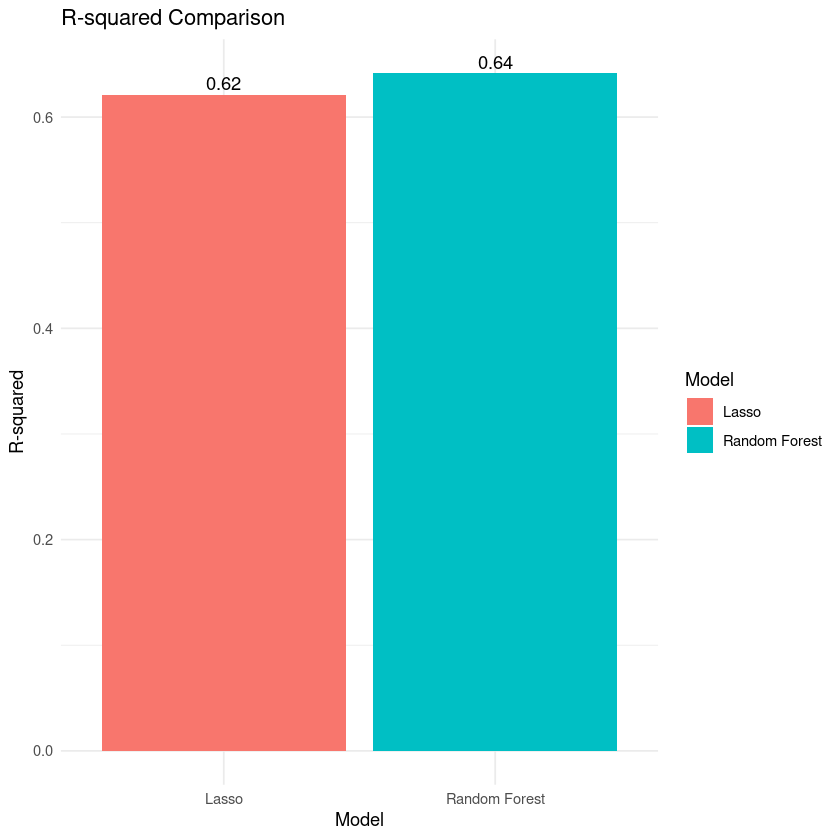

In [11]:
# 4. Comparing two models

# Combine the metrics into data frames for easier plotting
MAE_data <- data.frame(Model = c("Lasso", "Random Forest"), MAE = c(lasso_MAE, rf_MAE))
RMSE_data <- data.frame(Model = c("Lasso", "Random Forest"), RMSE = c(lasso_RMSE, rf_RMSE))
R2_data <- data.frame(Model = c("Lasso", "Random Forest"), R2 = c(lasso_R2, rf_R2))

# Plotting MAE
library(ggplot2)
ggplot(MAE_data, aes(x = Model, y = MAE, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = round(MAE, 2)), vjust = -0.3) +
  labs(title = "Mean Absolute Error Comparison", y = "Mean Absolute Error") +
  theme_minimal()

# Plotting RMSE
ggplot(RMSE_data, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = round(RMSE, 2)), vjust = -0.3) +
  labs(title = "Root Mean Squared Error Comparison", y = "Root Mean Squared Error") +
  theme_minimal()

# Plotting R2
ggplot(R2_data, aes(x = Model, y = R2, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = round(R2, 2)), vjust = -0.3) +
  labs(title = "R-squared Comparison", y = "R-squared") +
  theme_minimal()
